**Question 1:**
Use IRIS dataset from Sklearn and perform KNN. Compare with logistic regression.

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


Importing iris dataset from sklearn

In [ ]:
from sklearn.datasets import load_iris
data=load_iris()
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
data.data.shape

(150, 4)

In [ ]:
data.target.shape

(150,)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Spliting the train and test data

In [ ]:
from sklearn.model_selection import train_test_split ## training and testing
from sklearn.linear_model import LogisticRegression  ## for logistic regression
from sklearn.metrics import accuracy_score,confusion_matrix ## checking accuracy and confusion matrix 
from sklearn.preprocessing import StandardScaler ## scaling down the features

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(data.data,data.target,test_size=0.2,random_state=0)

In [ ]:
print('\n xtrain:',xtrain.shape)
print('\n xtest:',xtest.shape)
print('\n ytrain:',ytrain.shape)
print('\n ytest:',ytest.shape)


 xtrain: (120, 4)

 xtest: (30, 4)

 ytrain: (120,)

 ytest: (30,)


In [ ]:
scaler= StandardScaler()
scaler.fit(xtrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_xtrain=scaler.fit_transform(xtrain)
scaled_xtest=scaler.fit_transform(xtest)

Logistic Regression

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(scaled_xtrain,ytrain)   ## as we have scaled down the xtrain we use scaled_xtrain

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred=log_reg.predict(scaled_xtest)

In [ ]:
ypred

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
df_predicted=pd.DataFrame()
df_predicted['Actual']=ytest
df_predicted['Predicted']=ypred
df_predicted.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


In [ ]:
print('ACcuracy:',accuracy_score(ytest,ypred)*100)

ACcuracy: 76.66666666666667


By Logistic Regression we got 76% Accuracy

In [ ]:
matrix=confusion_matrix(ytest,ypred) 
matrix

array([[11,  0,  0],
       [ 0,  6,  7],
       [ 0,  0,  6]])

Text(69.0, 0.5, 'Predicted values')

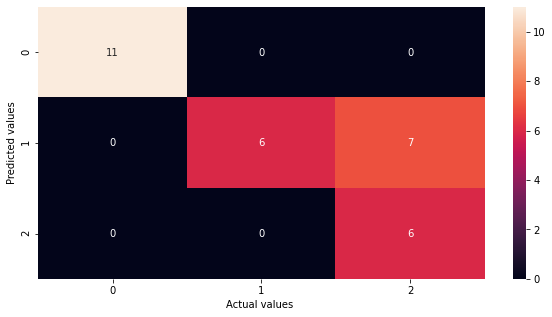

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix,annot=True)
plt.xlabel('Actual values ')
plt.ylabel('Predicted values')

# **Fitting K-NN classifier to the training set **

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
 #Predicting the test set result  
 ypred=classifier.predict(xtest)

In [ ]:
#Creating the Confusion matrix  
matrix1= confusion_matrix(ytest,ypred)
matrix1

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(69.0, 0.5, 'Predicted values')

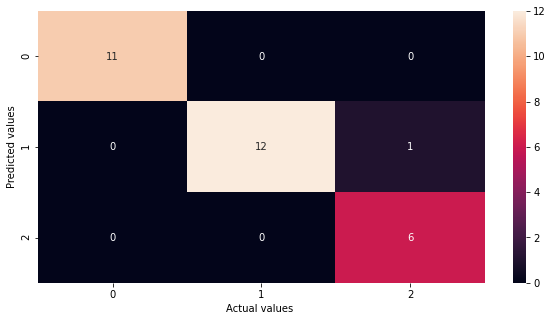

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix1,annot=True)
plt.xlabel('Actual values ')
plt.ylabel('Predicted values')

In [ ]:
## Checking the Accuracy
print('ACcuracy:',accuracy_score(ytest,ypred)*100)

ACcuracy: 96.66666666666667


By KNN we got 96% Accuracy  which is more than Logistic Regresion.
Hence we conclude that we should use KNN for this dataset.
